# Plus TI

## Exploración de datos

### Security Data Science

#### José Daniel Gómez Cabrera 21429


## Analisis exploratorio para is_fraud, buscando maximizar el monto salvado


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Configuración para visualizaciones más atractivas
plt.style.use('ggplot')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

Dimensionalidad del dataset


In [36]:
data = pd.read_csv('../data/dataset_feature_engineering.csv')

## 1. ANÁLISIS BÁSICO DEL DATASET


In [37]:
print("\n1. VISIÓN GENERAL DEL DATASET")
print(f"Registros totales: {data.shape[0]}")
print(f"Variables: {data.shape[1]}")


1. VISIÓN GENERAL DEL DATASET
Registros totales: 1852394
Variables: 35


## Verificar valores nulos


In [38]:
missing_values = data.isnull().sum()
print("\nValores nulos por columna:")
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No hay valores nulos")


Valores nulos por columna:
No hay valores nulos


## Información sobre tipos de datos


In [39]:
print("\nTipos de datos:")
print(data.dtypes)


Tipos de datos:
cc_num                               int64
merchant                            object
category                            object
amt                                float64
first                               object
last                                object
gender                              object
street                              object
city                                object
state                               object
zip                                  int64
lat                                float64
long                               float64
city_pop                             int64
job                                 object
dob                                 object
trans_num                           object
unix_time                            int64
merch_lat                          float64
merch_long                         float64
is_fraud                             int64
amt_month                          float64
amt_year                           fl

## 2. ANÁLISIS DE LA VARIABLE OBJETIVO (IS_FRAUD)


In [40]:
fraud_count = data['is_fraud'].value_counts()
fraud_percentage = data['is_fraud'].value_counts(normalize=True) * 100

print(f"\nDistribución de transacciones:")
print(f"No fraudulentas: {fraud_count[0]} ({fraud_percentage[0]:.2f}%)")
print(f"Fraudulentas: {fraud_count[1]} ({fraud_percentage[1]:.2f}%)")


Distribución de transacciones:
No fraudulentas: 1842743 (99.48%)
Fraudulentas: 9651 (0.52%)


## Visualización de la distribución de fraudes


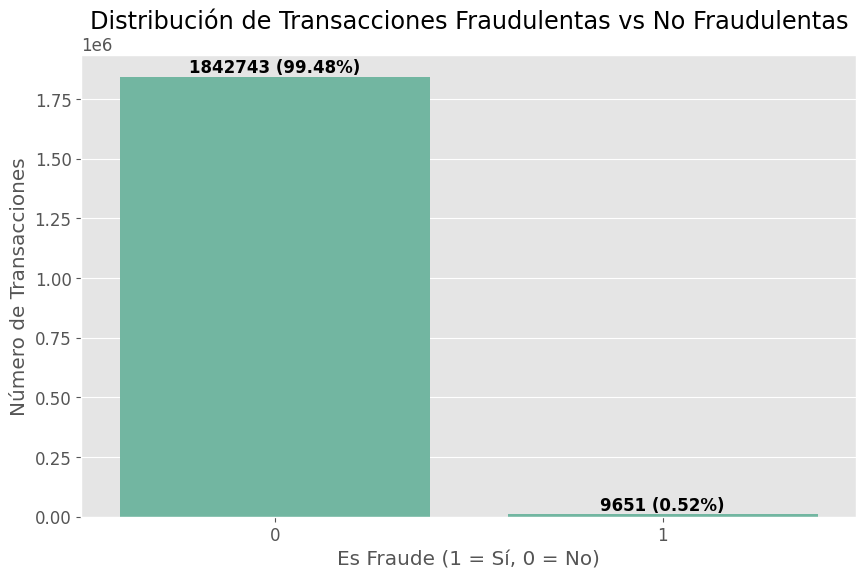

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_fraud', data=data)
plt.title('Distribución de Transacciones Fraudulentas vs No Fraudulentas')
plt.xlabel('Es Fraude (1 = Sí, 0 = No)')
plt.ylabel('Número de Transacciones')
for i, count in enumerate(fraud_count):
    plt.text(i, count + 50, f"{count} ({fraud_percentage[i]:.2f}%)", 
             ha='center', va='bottom', fontweight='bold')
plt.show()

## 3. ANÁLISIS DE LA VARIABLE AMOUNT (AMT)


In [42]:
print("\nEstadísticas descriptivas de la variable 'amt':")
amt_stats = data['amt'].describe()
print(amt_stats)


Estadísticas descriptivas de la variable 'amt':
count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64


In [43]:
# Calcular algunos percentiles adicionales para entender mejor la distribución
amt_percentiles = np.percentile(data['amt'], [1, 5, 10, 25, 50, 75, 90, 95, 99])
print("\nPercentiles de 'amt':")
for i, p in enumerate([1, 5, 10, 25, 50, 75, 90, 95, 99]):
    print(f"Percentil {p}: ${amt_percentiles[i]:.2f}")


Percentiles de 'amt':
Percentil 1: $1.26
Percentil 5: $2.44
Percentil 10: $4.10
Percentil 25: $9.64
Percentil 50: $47.45
Percentil 75: $83.10
Percentil 90: $136.33
Percentil 95: $195.34
Percentil 99: $537.90


## Calcular algunos percentiles adicionales para entender mejor la distribución


In [44]:
amt_percentiles = np.percentile(data['amt'], [1, 5, 10, 25, 50, 75, 90, 95, 99])
print("\nPercentiles de 'amt':")
for i, p in enumerate([1, 5, 10, 25, 50, 75, 90, 95, 99]):
    print(f"Percentil {p}: ${amt_percentiles[i]:.2f}")


Percentiles de 'amt':
Percentil 1: $1.26
Percentil 5: $2.44
Percentil 10: $4.10
Percentil 25: $9.64
Percentil 50: $47.45
Percentil 75: $83.10
Percentil 90: $136.33
Percentil 95: $195.34
Percentil 99: $537.90


## Visualizar la distribución de los montos


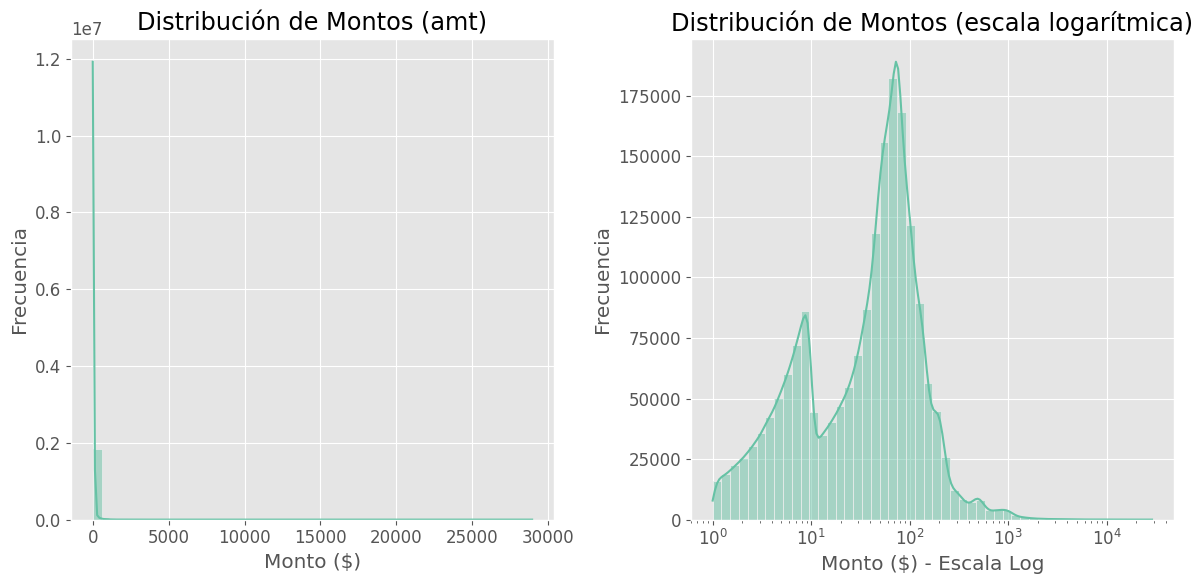

In [45]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['amt'], kde=True, bins=50)
plt.title('Distribución de Montos (amt)')
plt.xlabel('Monto ($)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(data['amt'], kde=True, bins=50, log_scale=True)
plt.title('Distribución de Montos (escala logarítmica)')
plt.xlabel('Monto ($) - Escala Log')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [46]:
# Detección de valores atípicos en la variable 'amt'
Q1 = np.percentile(data['amt'], 25)
Q3 = np.percentile(data['amt'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['amt'] < lower_bound) | (data['amt'] > upper_bound)]
print(f"\nNúmero de valores atípicos en 'amt': {len(outliers)}")
print(f"Porcentaje de valores atípicos: {len(outliers) / len(data) * 100:.2f}%")

# 4. RELACIÓN ENTRE IS_FRAUD Y AMT
print("\n" + "=" * 80)
print("4. RELACIÓN ENTRE IS_FRAUD Y AMT")
print("=" * 80)

# Estadísticas de amt agrupadas por is_fraud
amt_by_fraud = data.groupby('is_fraud')['amt'].describe()
print("\nEstadísticas de 'amt' por tipo de transacción:")
print(amt_by_fraud)

# Calcular el total de dinero en transacciones fraudulentas
total_fraud_amount = data[data['is_fraud'] == 1]['amt'].sum()
print(f"\nTotal de dinero en transacciones fraudulentas: ${total_fraud_amount:.2f}")
print(f"Este es el monto total que podríamos salvar detectando todos los fraudes.")

# Visualizar la distribución de montos por tipo de transacción
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_fraud', y='amt', data=data)
plt.title('Distribución de Montos por Tipo de Transacción')
plt.xlabel('Es Fraude (1 = Sí, 0 = No)')
plt.ylabel('Monto ($)')
plt.savefig('amount_by_fraud_boxplot.png')
plt.close()

# Crear un boxplot con escala logarítmica para mejor visualización
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_fraud', y='amt', data=data)
plt.yscale('log')
plt.title('Distribución de Montos por Tipo de Transacción (escala logarítmica)')
plt.xlabel('Es Fraude (1 = Sí, 0 = No)')
plt.ylabel('Monto ($) - Escala Log')
plt.savefig('amount_by_fraud_boxplot_log.png')
plt.close()

# Histogramas comparativos
plt.figure(figsize=(14, 6))
sns.histplot(data=data, x='amt', hue='is_fraud', multiple='dodge', bins=30, log_scale=True)
plt.title('Distribución de Montos por Tipo de Transacción')
plt.xlabel('Monto ($) - Escala Log')
plt.legend(['No Fraude', 'Fraude'])
plt.savefig('amount_by_fraud_hist.png')
plt.close()

# Histogramas de densidad superpuestos
plt.figure(figsize=(14, 6))
sns.kdeplot(data=data[data['is_fraud']==0]['amt'], label='No Fraude', log_scale=True)
sns.kdeplot(data=data[data['is_fraud']==1]['amt'], label='Fraude', log_scale=True)
plt.title('Densidad de Montos por Tipo de Transacción')
plt.xlabel('Monto ($) - Escala Log')
plt.ylabel('Densidad')
plt.legend()
plt.savefig('amount_by_fraud_density.png')
plt.close()

# 5. ANÁLISIS DE MONTOS POR CATEGORÍA Y SU RELACIÓN CON FRAUDES
print("\n" + "=" * 80)
print("5. ANÁLISIS DE MONTOS POR CATEGORÍA Y SU RELACIÓN CON FRAUDES")
print("=" * 80)

# Análisis de fraudes por categoría
category_fraud = data.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
print("\nTasa de fraude por categoría (ordenado de mayor a menor):")
print(category_fraud)

# Calcular estadísticas de montos por categoría
category_amt_stats = data.groupby('category')['amt'].agg(['mean', 'median', 'std', 'sum']).sort_values('sum', ascending=False)
print("\nEstadísticas de montos por categoría (ordenado por suma total):")
print(category_amt_stats)

# Calcular el monto total de fraudes por categoría
category_fraud_amt = data[data['is_fraud']==1].groupby('category')['amt'].sum().sort_values(ascending=False)
print("\nMonto total de fraudes por categoría (dinero que podría salvarse):")
print(category_fraud_amt)

# Visualizar las categorías con mayor monto total de fraudes
plt.figure(figsize=(14, 8))
category_fraud_amt.plot(kind='bar')
plt.title('Monto Total de Fraudes por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Monto Total de Fraudes ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('fraud_amount_by_category.png')
plt.close()

# Visualizar la tasa de fraude por categoría
plt.figure(figsize=(14, 8))
category_fraud.plot(kind='bar')
plt.title('Tasa de Fraude por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Porcentaje de Transacciones Fraudulentas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('fraud_rate_by_category.png')
plt.close()

# 6. SEGMENTACIÓN DE MONTOS Y ANÁLISIS DE FRAUDES
print("\n" + "=" * 80)
print("6. SEGMENTACIÓN DE MONTOS Y ANÁLISIS DE FRAUDES")
print("=" * 80)

# Crear segmentos de montos para un análisis más detallado
amount_bins = [0, 10, 50, 100, 500, 1000, 5000, float('inf')]
amount_labels = ['0-10', '10-50', '50-100', '100-500', '500-1000', '1000-5000', '5000+']
data['amt_segment'] = pd.cut(data['amt'], bins=amount_bins, labels=amount_labels)

# Análisis de fraudes por segmento de monto
segment_stats = data.groupby('amt_segment').agg({
    'is_fraud': ['count', 'mean', 'sum'],
    'amt': ['mean', 'sum']
})

# Formatear para mejor visualización
segment_stats.columns = ['_'.join(col).strip() for col in segment_stats.columns.values]
segment_stats['fraud_amt_sum'] = data[data['is_fraud']==1].groupby('amt_segment')['amt'].sum()
segment_stats['non_fraud_amt_sum'] = data[data['is_fraud']==0].groupby('amt_segment')['amt'].sum()
segment_stats['pct_of_total_fraud_amt'] = segment_stats['fraud_amt_sum'] / total_fraud_amount * 100

# Ordenar por la cantidad de dinero en fraudes
segment_stats = segment_stats.sort_values('fraud_amt_sum', ascending=False)

print("\nAnálisis de fraudes por segmento de monto:")
print(segment_stats)

# Visualizar los segmentos por monto total de fraudes
plt.figure(figsize=(14, 8))
segment_stats['fraud_amt_sum'].plot(kind='bar', color='darkred')
plt.title('Monto Total de Fraudes por Segmento de Monto')
plt.xlabel('Segmento de Monto ($)')
plt.ylabel('Monto Total de Fraudes ($)')
plt.grid(axis='y')

# Añadir etiquetas con el porcentaje del total
for i, v in enumerate(segment_stats['fraud_amt_sum']):
    plt.text(i, v + 0.5, f"{segment_stats['pct_of_total_fraud_amt'].iloc[i]:.1f}%", 
             ha='center', va='bottom')

plt.tight_layout()
plt.savefig('fraud_amount_by_segment.png')
plt.close()

# Visualizar la tasa de fraude por segmento de monto
plt.figure(figsize=(14, 8))
segment_stats['is_fraud_mean'].plot(kind='bar', color='navy')
plt.title('Tasa de Fraude por Segmento de Monto')
plt.xlabel('Segmento de Monto ($)')
plt.ylabel('Tasa de Fraude')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('fraud_rate_by_segment.png')
plt.close()

# 7. ANÁLISIS DE LA DISTRIBUCIÓN DE FRAUDES EN EL TIEMPO
print("\n" + "=" * 80)
print("7. ANÁLISIS DE LA DISTRIBUCIÓN DE FRAUDES EN EL TIEMPO")
print("=" * 80)

# Analizar por hora del día
hourly_fraud = data.groupby('hour').agg({
    'is_fraud': ['count', 'mean', 'sum'],
    'amt': ['mean', 'sum']
})
hourly_fraud.columns = ['_'.join(col).strip() for col in hourly_fraud.columns.values]
hourly_fraud['fraud_amt_sum'] = data[data['is_fraud']==1].groupby('hour')['amt'].sum()

print("\nAnálisis de fraudes por hora del día:")
print(hourly_fraud.sort_values('is_fraud_mean', ascending=False).head(10))

# Visualizar la tasa de fraude y el monto total de fraudes por hora
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Hora del Día')
ax1.set_xticks(range(0, 24))
ax1.set_ylabel('Tasa de Fraude', color=color)
ax1.plot(hourly_fraud.index, hourly_fraud['is_fraud_mean'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje Y para el monto
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Monto Total de Fraudes ($)', color=color)
ax2.plot(hourly_fraud.index, hourly_fraud['fraud_amt_sum'], color=color, linestyle='--', marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# Añadir título y grid
plt.title('Tasa de Fraude y Monto Total de Fraudes por Hora del Día')
ax1.grid(True, alpha=0.3)
fig.tight_layout()
plt.savefig('fraud_by_hour.png')
plt.close()

# 8. ANÁLISIS POR DISTANCIA ENTRE CLIENTE Y COMERCIANTE
print("\n" + "=" * 80)
print("8. ANÁLISIS POR DISTANCIA ENTRE CLIENTE Y COMERCIANTE")
print("=" * 80)

# Crear segmentos de distancia
distance_bins = [0, 10, 50, 100, 500, 1000, float('inf')]
distance_labels = ['0-10', '10-50', '50-100', '100-500', '500-1000', '1000+']
data['distance_segment'] = pd.cut(data['dist_between_client_and_merch'], bins=distance_bins, labels=distance_labels)

# Análisis de fraudes por segmento de distancia
distance_stats = data.groupby('distance_segment').agg({
    'is_fraud': ['count', 'mean', 'sum'],
    'amt': ['mean', 'sum']
})
distance_stats.columns = ['_'.join(col).strip() for col in distance_stats.columns.values]
distance_stats['fraud_amt_sum'] = data[data['is_fraud']==1].groupby('distance_segment')['amt'].sum()
distance_stats['pct_of_total_fraud_amt'] = distance_stats['fraud_amt_sum'] / total_fraud_amount * 100

print("\nAnálisis de fraudes por segmento de distancia:")
print(distance_stats)

# Visualizar la relación entre distancia, fraude y monto
plt.figure(figsize=(14, 8))
sns.scatterplot(x='dist_between_client_and_merch', y='amt', hue='is_fraud', size='amt', 
                sizes=(20, 200), alpha=0.5, palette={0: 'blue', 1: 'red'}, data=data)
plt.xscale('log')
plt.yscale('log')
plt.title('Relación entre Distancia, Monto y Fraude')
plt.xlabel('Distancia Cliente-Comerciante (escala log)')
plt.ylabel('Monto ($) (escala log)')
plt.legend(title='Es Fraude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('distance_amount_fraud_scatter.png')
plt.close()

# 9. ANÁLISIS DE COMERCIANTES CON MAYOR MONTO TOTAL DE FRAUDES
print("\n" + "=" * 80)
print("9. ANÁLISIS DE COMERCIANTES CON MAYOR MONTO TOTAL DE FRAUDES")
print("=" * 80)

# Top 10 comerciantes por monto total de fraudes
merchant_fraud_amt = data[data['is_fraud']==1].groupby('merchant')['amt'].sum().sort_values(ascending=False)
top_merchants_fraud = merchant_fraud_amt.head(10)

print("\nTop 10 comerciantes por monto total de fraudes:")
print(top_merchants_fraud)

# Visualizar los top 10 comerciantes por monto total de fraudes
plt.figure(figsize=(16, 8))
top_merchants_fraud.plot(kind='bar', color='darkred')
plt.title('Top 10 Comerciantes por Monto Total de Fraudes')
plt.xlabel('Comerciante')
plt.ylabel('Monto Total de Fraudes ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('top_merchants_fraud_amount.png')
plt.close()

# 10. CREACIÓN DE CARACTERÍSTICAS DE DINERO SALVADO
print("\n" + "=" * 80)
print("10. ANÁLISIS DE POTENCIAL DINERO SALVADO")
print("=" * 80)

# Crear una variable de dinero salvado potencial
data['potential_saved_money'] = data['amt'] * data['is_fraud']

# Dinero salvado potencial por categoría
saved_by_category = data.groupby('category')['potential_saved_money'].sum().sort_values(ascending=False)

print("\nDinero potencialmente salvado por categoría:")
print(saved_by_category)

# Dinero salvado potencial por segmento de monto
saved_by_amt_segment = data.groupby('amt_segment')['potential_saved_money'].sum().sort_values(ascending=False)

print("\nDinero potencialmente salvado por segmento de monto:")
print(saved_by_amt_segment)

# Visualizar el dinero potencialmente salvado por categoría
plt.figure(figsize=(16, 8))
saved_by_category.plot(kind='bar', color='green')
plt.title('Dinero Potencialmente Salvado por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Monto Potencialmente Salvado ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('saved_money_by_category.png')
plt.close()

# Visualizar el dinero potencialmente salvado por segmento de monto
plt.figure(figsize=(14, 8))
saved_by_amt_segment.plot(kind='bar', color='green')
plt.title('Dinero Potencialmente Salvado por Segmento de Monto')
plt.xlabel('Segmento de Monto ($)')
plt.ylabel('Monto Potencialmente Salvado ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('saved_money_by_segment.png')
plt.close()

# 11. IDENTIFICACIÓN DE PATRONES DE ALTO VALOR PARA MAXIMIZAR DINERO SALVADO
print("\n" + "=" * 80)
print("11. IDENTIFICACIÓN DE PATRONES DE ALTO VALOR PARA MAXIMIZAR DINERO SALVADO")
print("=" * 80)

# Calcular el valor Z de los montos
data['amt_zscore'] = stats.zscore(data['amt'])

# Definir transacciones de alto valor como aquellas con Z-score > 2
data['high_value_transaction'] = data['amt_zscore'] > 2

# Análisis de transacciones de alto valor
high_value_stats = data.groupby('high_value_transaction').agg({
    'is_fraud': ['count', 'mean', 'sum'],
    'amt': ['mean', 'sum'],
    'potential_saved_money': ['sum']
})
high_value_stats.columns = ['_'.join(col).strip() for col in high_value_stats.columns.values]

print("\nAnálisis de transacciones de alto valor (Z-score > 2):")
print(high_value_stats)

# Calcular el porcentaje de dinero salvado focalizando en transacciones de alto valor
high_value_saved_pct = (high_value_stats.loc[True, 'potential_saved_money_sum'] / total_fraud_amount) * 100
print(f"\nPorcentaje del total de fraudes que podría salvarse focalizando en transacciones de alto valor: {high_value_saved_pct:.2f}%")

# Calcular la eficiencia (dinero salvado por transacción analizada)
high_value_efficiency = high_value_stats.loc[True, 'potential_saved_money_sum'] / high_value_stats.loc[True, 'is_fraud_count']
all_efficiency = total_fraud_amount / len(data)
print(f"\nEficiencia de análisis (dinero salvado por transacción analizada):")
print(f"  - Todas las transacciones: ${all_efficiency:.2f} por transacción")
print(f"  - Solo transacciones de alto valor: ${high_value_efficiency:.2f} por transacción")
print(f"  - Mejora de eficiencia: {high_value_efficiency / all_efficiency:.2f}x")

# 12. ANÁLISIS DE COMBOS DE CARACTERÍSTICAS PARA MAXIMIZAR DINERO SALVADO
print("\n" + "=" * 80)
print("12. ANÁLISIS DE COMBOS DE CARACTERÍSTICAS PARA MAXIMIZAR DINERO SALVADO")
print("=" * 80)

# Crear una característica que combine alto valor y primera vez en comerciante
data['high_value_first_time'] = (data['high_value_transaction'] & data['first_time_at_merchant'])

# Crear una característica que combine alto valor y categoría de alto riesgo
# Definir categorías de alto riesgo como aquellas con tasa de fraude > promedio
avg_fraud_rate = data['is_fraud'].mean()
high_risk_categories = category_fraud[category_fraud > avg_fraud_rate].index.tolist()
data['high_risk_category'] = data['category'].isin(high_risk_categories)
data['high_value_high_risk_category'] = (data['high_value_transaction'] & data['high_risk_category'])

# Análisis de estas combinaciones
combo_vars = ['high_value_transaction', 'high_value_first_time', 'high_value_high_risk_category', 'high_risk_category']

combo_results = []
for var in combo_vars:
    # Filtrar transacciones que cumplen la condición
    filtered_data = data[data[var] == True]
    
    # Calcular métricas
    transaction_count = len(filtered_data)
    pct_of_total = transaction_count / len(data) * 100
    fraud_count = filtered_data['is_fraud'].sum()
    fraud_rate = filtered_data['is_fraud'].mean() * 100
    saved_money = filtered_data['potential_saved_money'].sum()
    pct_of_total_saved = saved_money / total_fraud_amount * 100
    efficiency = saved_money / transaction_count if transaction_count > 0 else 0
    
    # Guardar resultados
    combo_results.append({
        'Característica': var,
        'Transacciones': transaction_count,
        '% del Total': pct_of_total,
        'Fraudes': fraud_count,
        'Tasa de Fraude (%)': fraud_rate,
        'Dinero Salvado ($)': saved_money,
        '% del Total Salvado': pct_of_total_saved,
        'Eficiencia ($/transacción)': efficiency
    })

combo_df = pd.DataFrame(combo_results).sort_values('% del Total Salvado', ascending=False)
print("\nAnálisis de combinaciones de características para maximizar dinero salvado:")
print(combo_df)

# Visualizar los resultados de las combinaciones
plt.figure(figsize=(14, 10))
combo_plot = combo_df.plot(x='Característica', y=['% del Total', '% del Total Salvado'], kind='bar')
plt.title('Comparación de Estrategias de Detección')
plt.xlabel('Estrategia')
plt.ylabel('Porcentaje (%)')
plt.grid(axis='y')
plt.legend(['% de Transacciones a Analizar', '% de Dinero Salvado'])
plt.xticks(rotation=45, ha='right')

# Añadir la eficiencia como texto
for i, row in enumerate(combo_df.itertuples()):
    plt.text(i, row._7 + 3, f"Eficiencia: ${row._8:.2f}/transacción", ha='center')

plt.tight_layout()
plt.savefig('strategies_comparison.png')
plt.close()

# 13. RESUMEN Y CONCLUSIONES
print("\n" + "=" * 80)
print("13. RESUMEN Y CONCLUSIONES")
print("=" * 80)

print("\nRESUMEN DEL ANÁLISIS:")
print(f"- Total de transacciones: {len(data)}")
print(f"- Tasa de fraude global: {data['is_fraud'].mean()*100:.2f}%")
print(f"- Monto total de fraudes: ${total_fraud_amount:.2f}")
print(f"- Monto promedio de transacciones fraudulentas: ${data[data['is_fraud']==1]['amt'].mean():.2f}")
print(f"- Monto promedio de transacciones legítimas: ${data[data['is_fraud']==0]['amt'].mean():.2f}")

# Top estrategia por eficiencia
top_strategy = combo_df.iloc[combo_df['Eficiencia ($/transacción)'].idxmax()]
print(f"\nEstrategia más eficiente para maximizar dinero salvado:")
print(f"- Característica: {top_strategy['Característica']}")
print(f"- Solo requiere analizar el {top_strategy['% del Total']:.2f}% de las transacciones")
print(f"- Permite salvar el {top_strategy['% del Total Salvado']:.2f}% del dinero fraudulento")
print(f"- Eficiencia: ${top_strategy['Eficiencia ($/transacción)']:.2f} por transacción analizada")

print("\nCONCLUSIONES:")
print("1. Existe una clara diferencia en los patrones de montos entre transacciones fraudulentas y legítimas.")
print("2. Las transacciones de alto valor representan un porcentaje significativo del dinero total perdido por fraudes.")
print("3. Combinando características como el valor de la transacción y el riesgo de la categoría, se puede maximizar la eficiencia en la detección.")
print("4. Focalizarse en segmentos específicos de montos puede ser más eficiente que analizar todas las transacciones.")
print("5. La distancia entre el cliente y el comerciante muestra patrones interesantes en relación con los fraudes de alto valor.")

print("\nRECOMENDACIONES PARA MAXIMIZAR EL DINERO SALVADO:")
print("1. Priorizar la detección de transacciones de alto valor en categorías de alto riesgo.")
print("2. Implementar verificaciones adicionales para transacciones de primera vez con un comerciante que además son de alto valor.")
print("3. Establecer umbrales de alerta adaptados por categoría, considerando los patrones de fraude específicos de cada una.")
print("4. Desarrollar modelos predictivos que asignen mayor peso a las características asociadas con fraudes de alto valor.")
print("5. Implementar un sistema de puntuación de riesgo que considere no solo la probabilidad de fraude sino también el monto potencialmente salvado.")


Número de valores atípicos en 'amt': 95054
Porcentaje de valores atípicos: 5.13%

4. RELACIÓN ENTRE IS_FRAUD Y AMT

Estadísticas de 'amt' por tipo de transacción:
              count        mean         std   min      25%     50%      75%  \
is_fraud                                                                      
0         1842743.0   67.651278  153.548108  1.00    9.610   47.24   82.560   
1            9651.0  530.661412  391.028873  1.06  240.075  390.00  902.365   

               max  
is_fraud            
0         28948.90  
1          1376.04  

Total de dinero en transacciones fraudulentas: $5121413.29
Este es el monto total que podríamos salvar detectando todos los fraudes.

5. ANÁLISIS DE MONTOS POR CATEGORÍA Y SU RELACIÓN CON FRAUDES

Tasa de fraude por categoría (ordenado de mayor a menor):
category
shopping_net      0.015927
misc_net          0.013039
grocery_pos       0.012645
shopping_pos      0.006344
gas_transport     0.004106
misc_pos          0.002819
grocery_

<Figure size 1400x1000 with 0 Axes>